Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch [1/10], Step [100/600], Loss: 0.0145
Epoch [1/10], Step [200/600], Loss: 0.0113
Epoch [1/10], Step [300/600], Loss: 0.0124
Epoch [1/10], Step [400/600], Loss: 0.0134
Epoch [1/10], Step [500/600], Loss: 0.0060
Epoch [1/10], Step [600/600], Loss: 0.0025
Test Accuracy of the model on the 10000 test images: 97.98 %
Epoch [2/10], Step [100/600], Loss: 0.0026
Epoch [2/10], Step [200/600], Loss: 0.0043
Epoch [2/10], Step [300/600], Loss: 0.0014
Epoch [2/10], Step [400/600], Loss: 0.0087
Epoch [2/10], Step [500/600], Loss: 0.0028
Epoch [2/10], Step [600/600], Loss: 0.0094
Test Accuracy of the model on the 10000 test images: 98.21 %
Epoch [3/10], Step [100/600], Loss: 0.0058
Epoch [3/10], Step [200/600], Loss: 0.0040
Epoch [3/10], Step [300/600], Loss: 0.0027
Epoch [3/10], Step [400/600], Loss: 0.0037
Epoch [3/10], Step [500/600], Loss: 0.0008
Epoch [3/10], Step [600/600], Loss: 0.0081
Test 

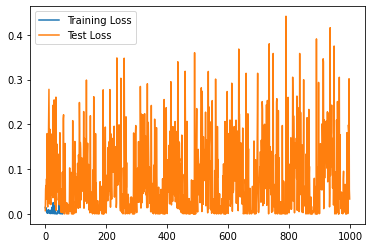

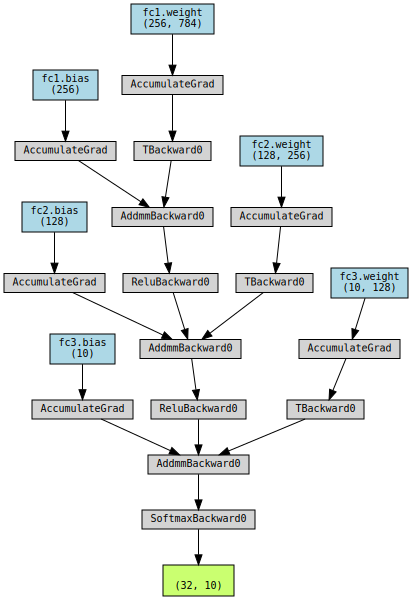

In [2]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
!pip install torchviz
# Hyperparameters
input_size = 784  # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # First hidden layer with 256 units
        self.fc2 = nn.Linear(256, 128)  # Second hidden layer with 128 units
        self.fc3 = nn.Linear(128, 10)  # Output layer with 10 units

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))  # Apply ReLU activation to first hidden layer output
        x = nn.functional.relu(self.fc2(x))  # Apply ReLU activation to second hidden layer output
        x = nn.functional.softmax(self.fc3(x), dim=1)  # Apply softmax activation to output layer output
        return x


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(fnn.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
train_loss = []
test_loss = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward pass
        outputs = fnn(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
            # Save training loss
            train_loss.append(loss.item())

    # Test the model
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28)
            labels = labels
            outputs = fnn(images)
            loss = criterion(outputs, labels)
            
            # Save test loss
            test_loss.append(loss.item())

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Plot training and test loss over iterations
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()
plt.show()

from torchviz import make_dot

# Create an instance of the FNN model
model = FNN()

# Generate some dummy input data
x = torch.randn(32, 784)

# Visualize the computational graph of the model
y = model(x)
make_dot(y, params=dict(model.named_parameters()))

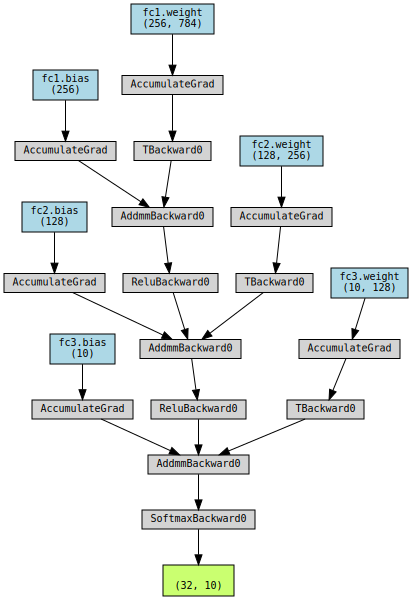

In [3]:
model = FNN()

# Generate some dummy input data
x = torch.randn(32, 784)

# Visualize the computational graph of the model
y = model(x)
make_dot(y, params=dict(model.named_parameters()))